In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.read_table('result_ds1.txt')

In [13]:
df['time_stamp'] = [(x - df['time_stamp'][0])/1e6 for x in df['time_stamp']]

In [14]:
df.head()

,time_stamp,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth,px,py,v,yaw,yaw_rate,sensor_type,NIS
0,0.00,0.600000,0.600000,5.19994,0.000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,L,0.000000
1,0.05,0.859997,0.600045,5.19975,0.001797,0.735492,0.629623,7.20011,-2.761520e-17,1.158260e-17,R,74.762400
2,0.10,1.119980,0.600225,5.19943,0.005390,1.160500,0.494953,7.20317,-1.272200e-01,-1.185830e-02,L,0.221167
3,0.15,1.379960,0.600629,5.19898,0.010778,1.258080,0.533061,7.18852,1.229000e-01,3.067050e-02,R,1.824760
4,0.20,1.639900,0.601347,5.19839,0.017960,1.615750,0.595371,7.20190,1.616470e-01,4.624090e-02,L,0.167690


## Estimate longitudinal and yaw accelerations

Low: -0.7144 high: 0.82724
Sigma:  0.38541


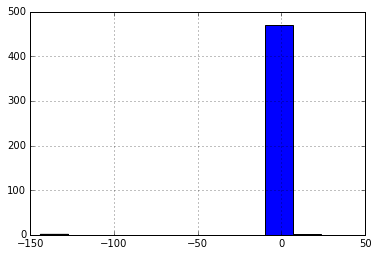

In [18]:
# estimate longitudinal acceleration
#df['longitudinal_rate'] = df.apply(lambda r: np.sqrt(r.vx_ground_truth**2 + r.vy_ground_truth**2), axis=1)
df['longitudinal_acc'] = (df['v'] - df['v'].shift(-1))/0.05
df['longitudinal_acc'].hist()
low = np.nanpercentile(df['longitudinal_acc'], 2.5)
high = np.nanpercentile(df['longitudinal_acc'], 97.5)
print('Low: ' + str(low), 'high: ' + str(high))
print('Sigma: ', (high-low)/4)

Since 95% of the time, 'longitudinal_acc' should be in the range [-2*sigma, 2*sigma]. So in this case longitudinal_acc sigma is around 0.4 m/s^2.

Low: -0.0653372 high: 0.0569398
Sigma:  0.03056925


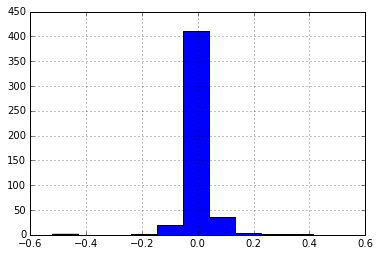

In [21]:
# estimate yaw acceleration
df['yaw_rate_change'] = (df['yaw_rate'] - df['yaw_rate'].shift(-1))
df['yaw_rate_change'].hist()
low = np.nanpercentile(df['yaw_rate_change'], 2.5)
high = np.nanpercentile(df['yaw_rate_change'], 97.5)
print('Low: ' + str(low), 'high: ' + str(high))
print('Sigma: ', (high-low)/4)

Since 95% of the time, 'yaw_rate_change' should be in the range [-2*sigma, 2*sigma]. So in this case sigma is around 0.3 rad/s^2.

## Track error in x and y positions

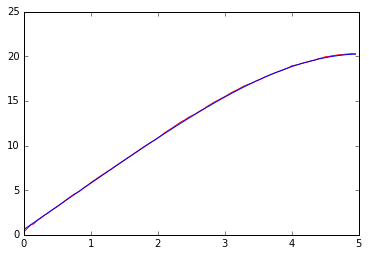

In [54]:
plt.plot(df['time_stamp'][0:100], df['px'][0:100], 'r')
plt.plot(df['time_stamp'][0:100], df['px_ground_truth'][0:100], 'b')

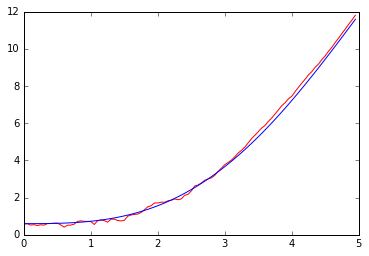

In [55]:
plt.plot(df['time_stamp'][0:100], df['py'][0:100], 'r')
plt.plot(df['time_stamp'][0:100], df['py_ground_truth'][0:100], 'b')

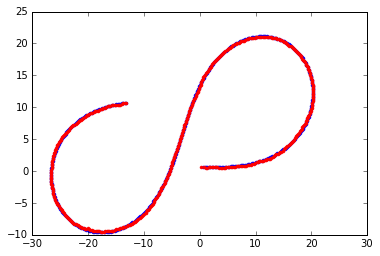

In [8]:
plt.plot(df['px_ground_truth'], df['py_ground_truth'], '.b')
plt.plot(df['px'], df['py'], '.r')


## NIS Plots

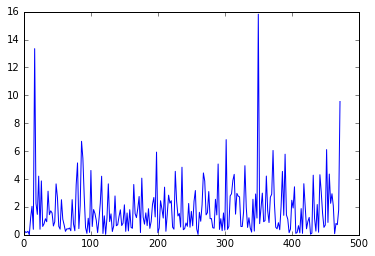

In [15]:
plt.plot(df[df.sensor_type == 'L'].NIS)

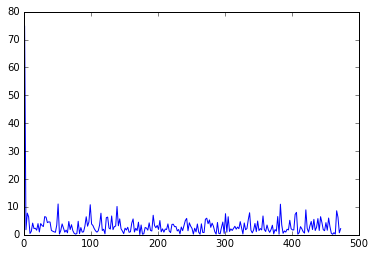

In [16]:
plt.plot(df[df.sensor_type == 'R'].NIS)